# Task-6 Prediction Using Decision Tree

By Ekta Dagar

TASK: Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this 
classifier, it would be able to predict the right class accordingly. 

In [1]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import tree

Importing the iris datadet and loading it into a dataframe by adding a new column into it.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


The iris data set contains four features, three classes of flowers, and 150 samples.

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In the target column, numerically, setosa flowers are identified by zero, versicolor by one, and virginica by two.

In [4]:
df.shape

(150, 5)

In [5]:
df.describe() # Descriptive Statistics

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.isnull().sum() # checking for missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

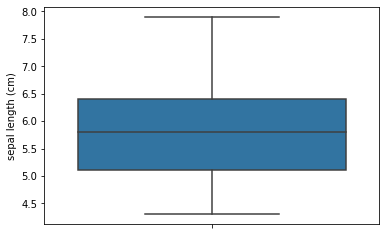

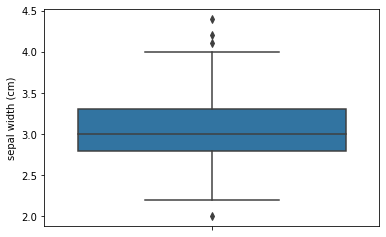

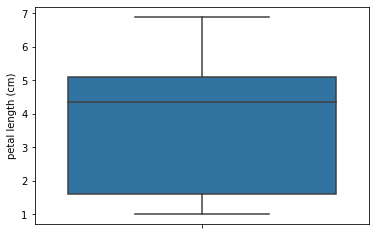

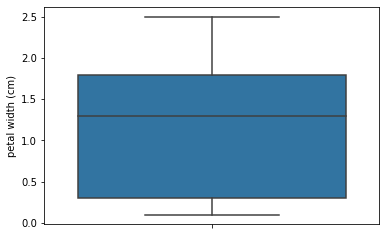

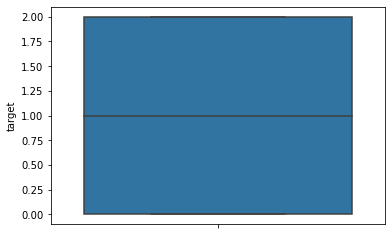

In [7]:
# To find outliers
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

from the above boxplots, it is clear that there are outliers in the column 'sepal width (cm)'

In [8]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 5)

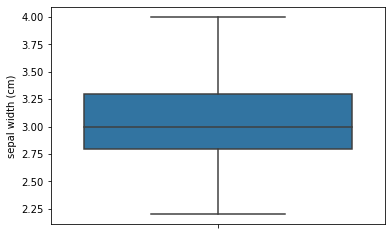

In [9]:
# Blocplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

Splitting Data into Training and Test Sets: puts 75% of the data into a training set and 25% of the data into a test set.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [11]:
#Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [12]:
#Train the model on the data
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [13]:
#Predict labels of unseen (test) data
clf.predict(X_test)


array([0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1])

Visualizing Decision Trees with Matplotlib using scikit-learn’s tree.plot_tree

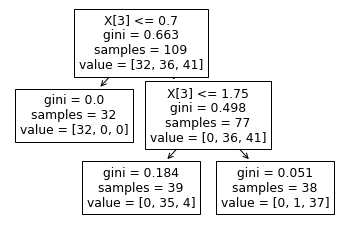

In [14]:
tree.plot_tree(clf);

Adding in feature and class names:

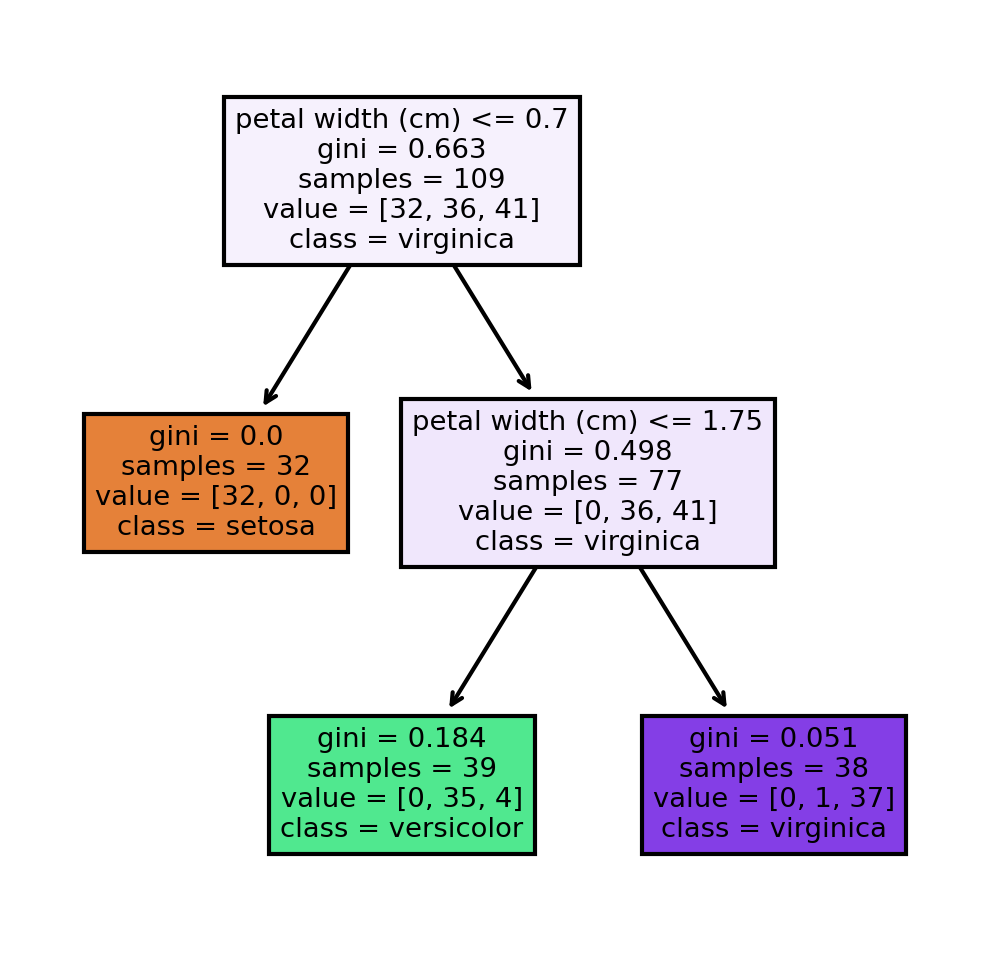

In [15]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('image1.png')

From this visualization, we can find out the species of a flower on the basis of mentioned features.

Conclusion: We can feed any new test data to this classifer and it would be able to predict the right class accordingly.